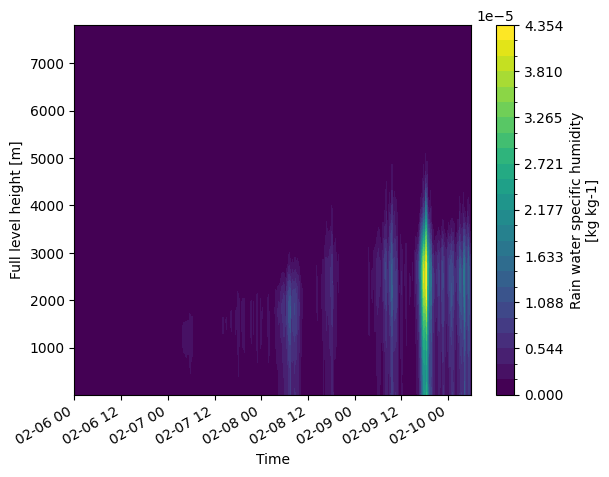

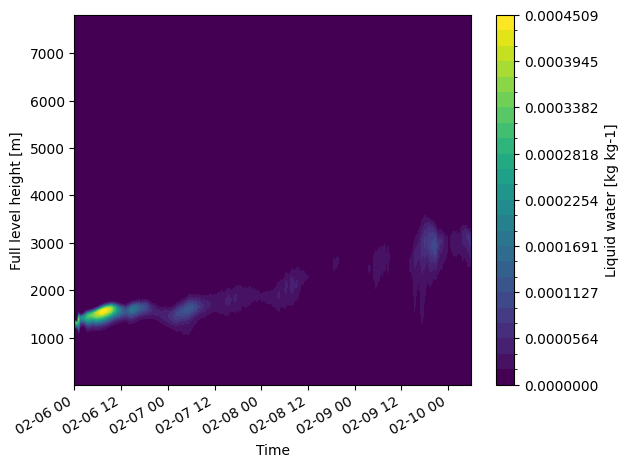

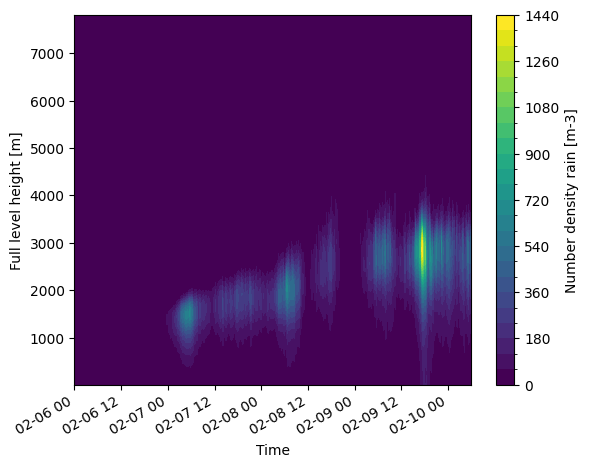

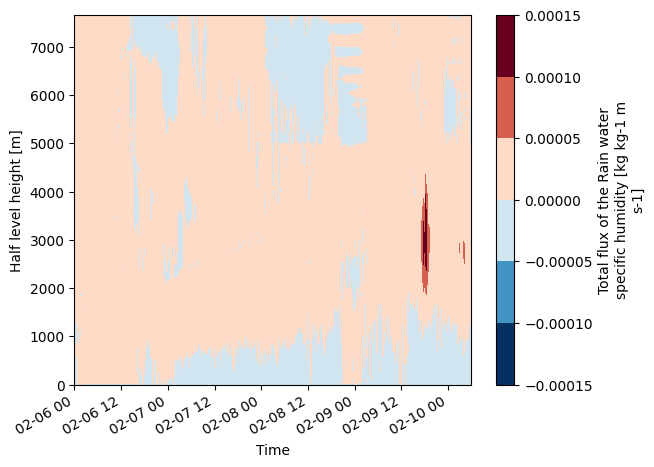

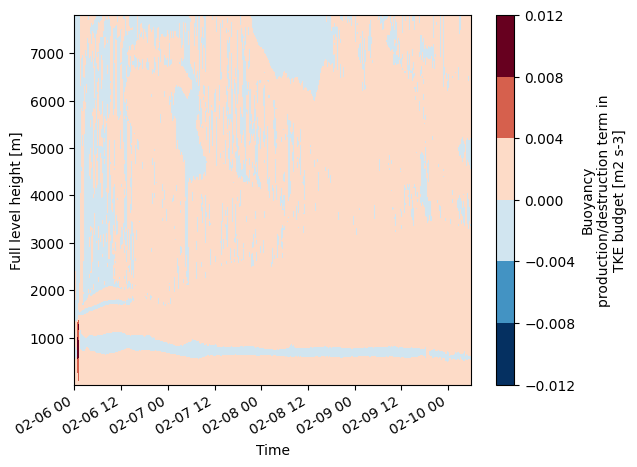

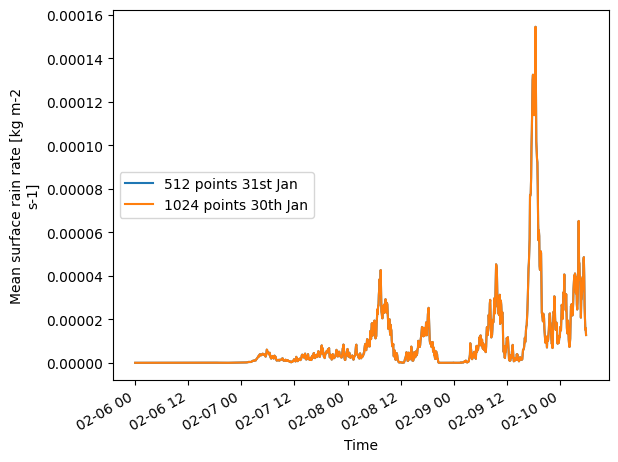

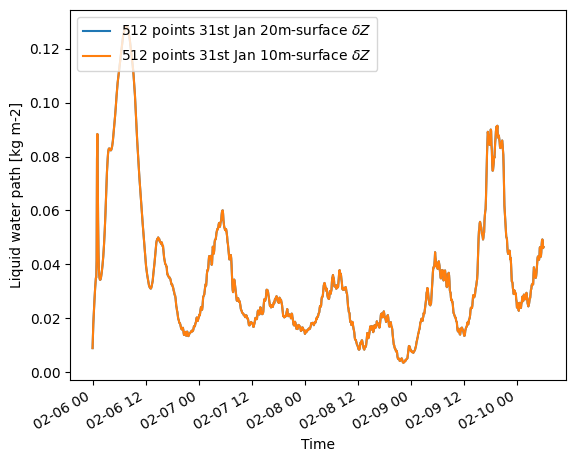

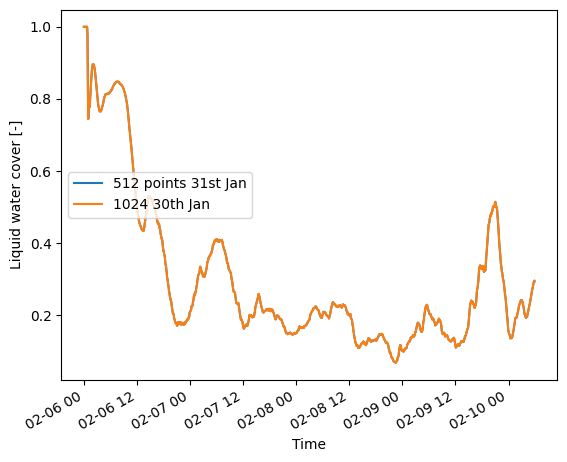

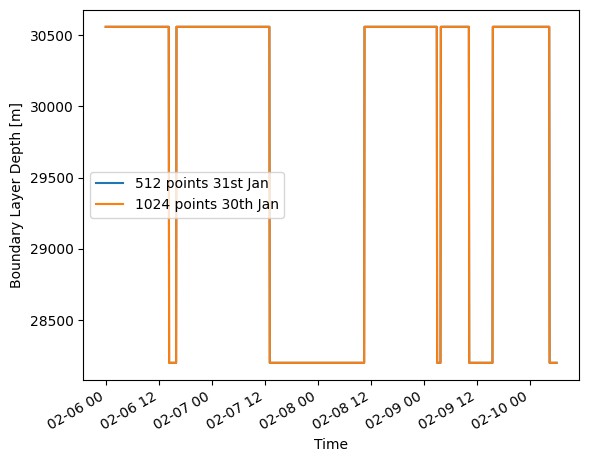

In [7]:
### Plot from 3 files ###
import numpy as np
import matplotlib.pyplot as pl
import netCDF4 as nc
import xarray as xr
from datetime import datetime


#pwd='/users/PFS0220/graghuna/microhh/microhh/cases/eurec4a/case_1060T1_feb2_100m_36hrs/'
pwd='/fs/ess/PFS0220/eurec4a/case_feb9/'
nc_nums=1;
nc_vals = ['0000']
dz=40; z_ind=int(6000/dz);
startdate=datetime(2020,1,30,00,00)


for n in range(nc_nums):
    nc_filename='eurec4a.default.000' + nc_vals[n]+'.nc';
    xrdata=xr.open_dataset(pwd+nc_filename,decode_times=True)
    xrdata_def=xr.open_dataset(pwd+nc_filename,group='default',decode_times=True);
    xrdata_thermo=xr.open_dataset(pwd+nc_filename,group='thermo',decode_times=True);
    xrdata_rad=xr.open_dataset(pwd+nc_filename,group='radiation',decode_times=True);
    xrdata_budget=xr.open_dataset(pwd+nc_filename,group='budget',decode_times=True);

    microhh_out1=xr.merge([xrdata, xrdata_def, xrdata_thermo, xrdata_rad, xrdata_budget])
    if n==0:
        microhh_out=microhh_out1
    else:
        microhh_out=xr.merge([microhh_out,microhh_out1])

pwd='/fs/ess/PFS0220/eurec4a/case_feb9/'
nc_nums=1;
nc_vals = ['0000']

for n in range(nc_nums):
    nc_filename='eurec4a.default.000' + nc_vals[n]+'.nc';
    xrdata=xr.open_dataset(pwd+nc_filename,decode_times=True)
    xrdata_def=xr.open_dataset(pwd+nc_filename,group='default',decode_times=True);
    xrdata_thermo=xr.open_dataset(pwd+nc_filename,group='thermo',decode_times=True);
    xrdata_rad=xr.open_dataset(pwd+nc_filename,group='radiation',decode_times=True);
    xrdata_budget=xr.open_dataset(pwd+nc_filename,group='budget',decode_times=True);

    microhh_out1=xr.merge([xrdata, xrdata_def, xrdata_thermo, xrdata_rad, xrdata_budget])
    if n==0:
        microhh_out2=microhh_out1
    else:
        microhh_out2=xr.merge([microhh_out2,microhh_out1])

pl.figure()
microhh_out['qr'].isel(z=slice(0,z_ind)).transpose().plot.contourf(levels=np.linspace(0,np.max(microhh_out['qr'].values),25))

pl.figure()
microhh_out['ql'].isel(z=slice(0,z_ind)).transpose().plot.contourf(levels=np.linspace(0,np.max(microhh_out['ql'].values),25))

pl.figure()
microhh_out['nr'].isel(z=slice(0,z_ind)).transpose().plot.contourf(levels=np.linspace(0,np.max(microhh_out['nr'].values),25))

pl.figure()
microhh_out['qr_flux'].isel(zh=slice(0,z_ind)).transpose().plot.contourf()

pl.figure()
microhh_out['tke_buoy'].isel(z=slice(0,z_ind)).transpose().plot.contourf()

pl.figure()
microhh_out['rr'].plot.line(label='512 points 31st Jan')
microhh_out2['rr'].plot.line(label='1024 points 30th Jan')
pl.legend(loc="center left")

pl.figure()
microhh_out['ql_path'].plot.line(label=f'512 points 31st Jan 20m-surface $\delta Z$')
microhh_out2['ql_path'].plot.line(label=f'512 points 31st Jan 10m-surface $\delta Z$')
pl.legend(loc="upper left")

pl.figure()
microhh_out['ql_cover'].plot.line(label='512 points 31st Jan')
microhh_out2['ql_cover'].plot.line(label='1024 30th Jan')
pl.legend(loc="center left")

pl.figure()
microhh_out['zi'].plot.line(label='512 points 31st Jan')
microhh_out2['zi'].plot.line(label='1024 points 30th Jan')
pl.legend(loc="center left")


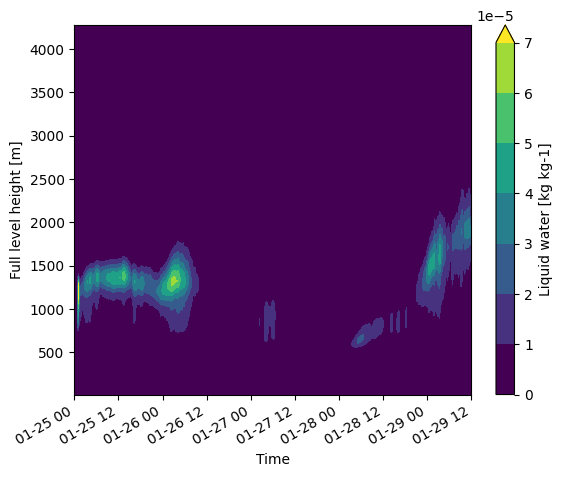

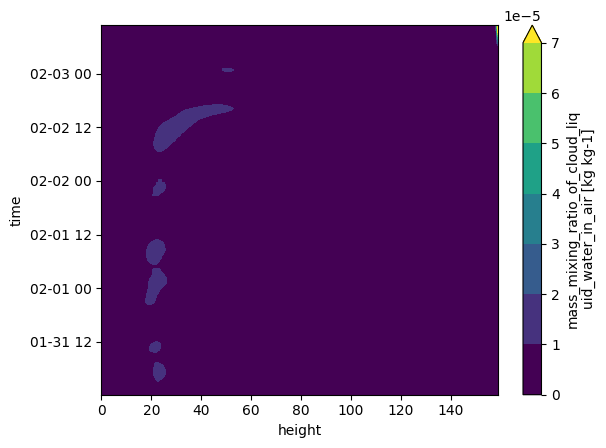

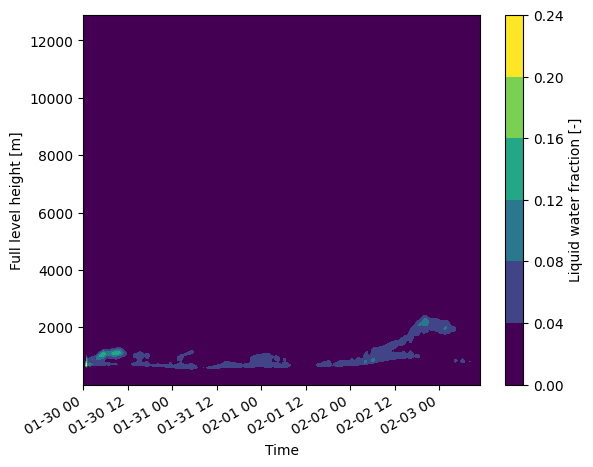

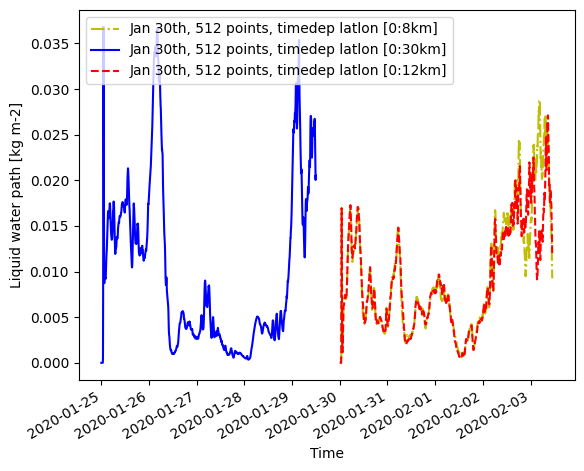

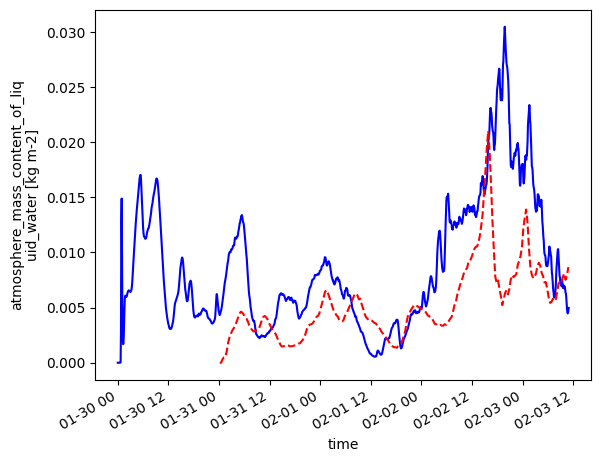

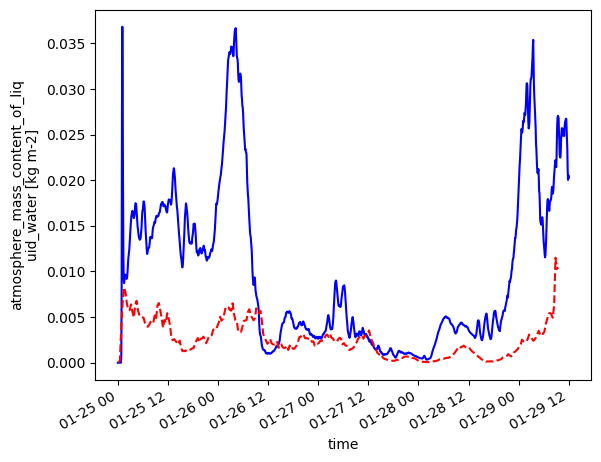

In [3]:
### Plot from 3 files ###
import numpy as np
import matplotlib.pyplot as pl
import netCDF4 as nc
import xarray as xr
from datetime import datetime
import netCDF4 as nc
from netCDF4 import Dataset
from scipy.signal import savgol_filter

#pwd='/users/PFS0220/graghuna/microhh/microhh/cases/eurec4a/case_1060T1_feb2_100m_36hrs/'
pwd='/fs/ess/PFS0220/eurec4a/case_feb2nd_512_200m_jan30_tdtrans/'
nc_nums=1;
nc_vals = ['0000']
dz=40; z_ind=int(6000/dz);
startdate=datetime(2020,1,30,00,00)
label1='Jan 30th, 512 points, timedep latlon [0:8km]'
label2= 'Jan 30th, 512 points, timedep latlon [0:30km]'
label3= 'Jan 30th, 512 points, timedep latlon [0:30km] SP'
label4= 'Jan 30th, 512 points, timedep latlon [0:12km]'

for n in range(nc_nums):
    nc_filename='eurec4a.512.default.000' + nc_vals[n]+'.nc';
    microhh_out1=xr.open_dataset(pwd+nc_filename,decode_times=True)
    rootgroup = Dataset(pwd+nc_filename,"r")
    for group in rootgroup.groups:
        microhh_out1=xr.merge([microhh_out1, xr.open_dataset(pwd+nc_filename,group=group,decode_times=True)])
    if n==0:
        microhh_out=microhh_out1
    else:
        microhh_out=xr.merge([microhh_out,microhh_out1])

pwd='/fs/ess/PFS0220/eurec4a/case_feb2nd_512_200m_jan30_varlln/'
pwd='/fs/ess/PFS0220/eurec4a/case_jan28/'
nc_nums=1;
nc_vals = ['0000']

for n in range(nc_nums):
    nc_filename='eurec4a.default.000' + nc_vals[n]+'.nc';
    microhh_out1=xr.open_dataset(pwd+nc_filename,decode_times=True)
    rootgroup = Dataset(pwd+nc_filename,"r")
    for group in rootgroup.groups:
        microhh_out1=xr.merge([microhh_out1, xr.open_dataset(pwd+nc_filename,group=group,decode_times=True)])
    if n==0:
        microhh_out2=microhh_out1
    else:
        microhh_out2=xr.merge([microhh_out2,microhh_out1])
        
pwd='/fs/ess/PFS0220/eurec4a/case_feb2nd_testsp/'
nc_nums=1;
nc_vals = ['0000']

for n in range(nc_nums):
    nc_filename='eurec4a.default.000' + nc_vals[n]+'.nc';
    microhh_out1=xr.open_dataset(pwd+nc_filename,decode_times=True)
    rootgroup = Dataset(pwd+nc_filename,"r")
    for group in rootgroup.groups:
        microhh_out1=xr.merge([microhh_out1, xr.open_dataset(pwd+nc_filename,group=group,decode_times=True)])
    if n==0:
        microhh_out3=microhh_out1
    else:
        microhh_out3=xr.merge([microhh_out2,microhh_out1])

pwd='/fs/ess/PFS0220/eurec4a/case_feb2nd_512_200m_jan30_tdtrans/'
nc_nums=1;
nc_vals = ['0000']

for n in range(nc_nums):
    nc_filename='eurec4a.default.000' + nc_vals[n]+'.nc';
    microhh_out1=xr.open_dataset(pwd+nc_filename,decode_times=True)
    rootgroup = Dataset(pwd+nc_filename,"r")
    for group in rootgroup.groups:
        microhh_out1=xr.merge([microhh_out1, xr.open_dataset(pwd+nc_filename,group=group,decode_times=True)])
    if n==0:
        microhh_out4=microhh_out1
    else:
        microhh_out4=xr.merge([microhh_out2,microhh_out1])

pwd='/fs/ess/PFS0220/eurec4a/forcings/'
nc_filename='eurec4a_20200202_narenpitak_extended.kpt_inversion.nc'
era5_forcing=xr.open_dataset(pwd+nc_filename,decode_times=True)
#era5_forcing2=xr.open_dataset(pwd+nc_filename,decode_times=False)

def fig_plot():
    pl.figure()
    microhh_out3['qr'].isel(z=slice(0,z_ind)).transpose().plot.contourf(levels=np.linspace(0,np.max(microhh_out['qr'].values),25))

    pl.figure()
    microhh_out3['thl'].isel(z=slice(0,z_ind+10)).transpose().plot.contourf()

    pl.figure()
    microhh_out3['qt'].isel(z=slice(0,z_ind+10)).transpose().plot.contourf()

    pl.figure()
    microhh_out3['ql_frac'].isel(z=slice(0,z_ind+10)).transpose().plot.contourf(levels=np.linspace(0,np.max(microhh_out3['ql_frac'].values),10))

    pl.figure()
    microhh_out3['nr'].isel(z=slice(0,z_ind)).transpose().plot.contourf(levels=np.linspace(0,np.max(microhh_out['nr'].values),25))

    pl.figure()
    microhh_out3['qr_flux'].isel(zh=slice(0,z_ind)).transpose().plot.contourf()

    pl.figure()
    microhh_out['tke_buoy'].isel(z=slice(0,z_ind)).transpose().plot.contourf()

    pl.figure()
    microhh_out['rr'].plot.line(label=label1)
    microhh_out2['rr'].plot.line(label=label2)
    microhh_out3['rr'].plot.line(label=label3)
    pl.legend(loc="center left")

    pl.figure()
    microhh_out['ql_path'].plot.line(label=label1)
    microhh_out2['ql_path'].plot.line(label=label2)
    microhh_out3['ql_path'].plot.line(label=label3)
    pl.legend(loc="upper left")

    microhh_out['ql_path'].values=savgol_filter(microhh_out['ql_path'].values,3,2)
    pl.figure()
    #pl.plot(savgol_filter(microhh_out['ql_path'].values,100,4))
    pl.plot(savgol_filter(microhh_out['ql_path'].values,200,4))
    pl.plot(microhh_out['ql_path'].values,'y--')

    pl.figure()
    microhh_out['ql_path_filter']=microhh_out['ql_path']
    microhh_out['ql_path_filter'].values=savgol_filter(microhh_out['ql_path'].values,200,4)
    microhh_out2['ql_path_filter']=microhh_out2['ql_path']
    microhh_out2['ql_path_filter'].values=savgol_filter(microhh_out2['ql_path'].values,200,4)
    microhh_out3['ql_path_filter']=microhh_out3['ql_path']
    microhh_out3['ql_path_filter'].values=savgol_filter(microhh_out3['ql_path'].values,200,4)
    microhh_out['ql_path_filter'].plot.line(label=label1)
    microhh_out2['ql_path_filter'].plot.line(label=label2)
    microhh_out3['ql_path_filter'].plot.line(label=label3)
    pl.ylabel(f'Filtered LWP kg$/m^{2}$')
    pl.legend(loc="upper left")

    pl.figure()
    microhh_out['ql_path_filter'].plot.line('k-',label='Filtered LWP')
    microhh_out['ql_path'].plot.line('y--',label='Actual LWP')
    pl.legend(loc="upper left")

    pl.figure()
    microhh_out['ql_path'].values=microhh_out['ql_path'].values-savgol_filter(microhh_out['ql_path'].values,200,4)
    microhh_out2['ql_path'].values=microhh_out2['ql_path'].values-savgol_filter(microhh_out2['ql_path'].values,200,4)
    microhh_out3['ql_path'].values=microhh_out3['ql_path'].values-savgol_filter(microhh_out3['ql_path'].values,200,4)
    microhh_out['ql_path'].plot.line(label=label1)
    microhh_out2['ql_path'].plot.line(label=label2)
    microhh_out3['ql_path'].plot.line(label=label3)
    pl.legend(loc="upper left")
    pl.ylabel(f'LWP Fluctuations kg$/m^{2}$')



    pl.figure()
    microhh_out['ql_cover'].plot.line(label=label1)
    microhh_out2['ql_cover'].plot.line(label=label2)
    microhh_out3['ql_cover'].plot.line(label=label3)
    pl.legend(loc="upper left")

    pl.figure()
    microhh_out['lw_flux_dn'].isel(zh=0).plot.line(label=label1)
    microhh_out2['lw_flux_dn'].isel(zh=0).plot.line(label=label2)
    microhh_out3['lw_flux_dn'].isel(zh=0).plot.line(label=label3)
    pl.legend(loc="upper left")

    pl.figure()
    microhh_out['zi'].plot.line(label=label1)
    microhh_out2['zi'].plot.line(label=label2)
    pl.legend(loc="center left")

    pl.figure()
    era5_forcing['open_sst'].plot.line('y--')
    era5_forcing['sst_filter']=era5_forcing['open_sst']
    era5_forcing['sst_filter'].values=savgol_filter(era5_forcing['open_sst'].values,24,4)
    era5_forcing['sst_filter'].plot.line('b-')

    pl.figure()
    era5_forcing['ps'].plot()
    era5_forcing['ps_filter']=era5_forcing['ps']
    era5_forcing['ps_filter'].values=savgol_filter(era5_forcing['ps'].values,12,5)
    era5_forcing['ps_filter'].plot()

    pl.figure()
    era5_forcing['sst_filter'].values=era5_forcing['open_sst'].values-era5_forcing['sst_filter'].values
    (era5_forcing['sst_filter']/0.06).plot.line('y--',label='sst fluctuations')
    (microhh_out['ql_path']/0.0075).plot.line(label='lwp fluctuations')
    pl.legend(loc="upper right")
    pl.ylabel('Fluctuations from Flitered profiles')

    pl.figure()
    #zsize=era5_forcing['nlev'].size
    #era5_forcing2=era5_forcing2.expand_dims({"height_single": zsize})
    #era5_forcing2.assign(height_single=era5_forcing['height_f'].isel(time=0))
    era5_forcing['u'].isel(nlev=slice(30,None)).transpose().plot.contourf()
    pl.gca().invert_yaxis()
    #pl.yticks([era5_forcing['nlev'].isel(nlev=slice(30,None,20))],[era5_forcing['height_f'].isel(time=0,nlev=slice(30,None,20)).values[:]])

    pl.figure()
    microhh_out['u'].transpose().plot.contourf()

    pl.figure()
    era5_forcing['height_f'].isel(time=0,nlev=slice(220,230)).plot()

    pl.figure()
    era5_forcing['u'].isel(nlev=229).plot.line(label='era5')
    microhh_out['u'].isel(z=19).plot.line(label='microHH')
    microhh_out2['u'].isel(z=19).plot.line(label='microHH with 0 u&v Trans')
    pl.legend(bbox_to_anchor=(0.3, 1.05),loc="lower left")

    pl.figure()
    era5_forcing['v'].isel(nlev=229).plot.line(label='era5')
    microhh_out['v'].isel(z=19).plot.line(label='microHH')
    microhh_out2['v'].isel(z=19).plot.line(label='microHH with 0 u&v Trans')
    pl.legend(bbox_to_anchor=(0.3, 1.05),loc="lower left")

    pl.figure()
    pl.plot(microhh_out['ql_path'].isel(time=slice(None,None,12)),era5_forcing['ps'].isel(time=slice(1,None)),'b.')
    pl.xlabel(f'LWP kg$/m^{2}$')

    pl.figure()
    #(microhh_out['lw_flux_up']-microhh_out['lw_flux_dn']).isel(zh=0).plot.line(label='LW Flux'+label1)
    #(microhh_out2['lw_flux_up']-microhh_out2['lw_flux_dn']).isel(zh=0).plot.line(label='LW Flux'+label2)
    (microhh_out['sw_flux_up']-microhh_out['sw_flux_dn']).isel(zh=0).plot.line(label='SW Flux'+label1)
    (microhh_out2['sw_flux_up']-microhh_out2['sw_flux_dn']).isel(zh=0).plot.line(label='SW Flux'+label2)

pl.figure()
microhh_out2['ql'].isel(z=slice(0,110)).transpose().plot.contourf(levels=np.arange(0,7.5e-5,1e-5))

pl.figure()
xr.open_dataset('/fs/ess/PFS0220/eurec4a/SAM_results/EUREC4A_2Feb_512sqx160_100m_SAM_kc.nc',decode_times=True)['qlc'].plot.contourf(levels=np.arange(0,7.5e-5,1e-5))

pl.figure()
microhh_out3['ql_frac'].isel(z=slice(0,160)).transpose().plot.contourf()

pl.figure()
microhh_out['ql_path'].plot.line('y-.',label=label1)
microhh_out2['ql_path'].plot.line('b-',label=label2)
#microhh_out3['ql_path'].plot.line('y-.',label=label3)
microhh_out4['ql_path'].plot.line('r--',label=label4)
pl.legend(loc="upper left")

pl.figure()
microhh_out3['ql_path'].plot.line('b-',label=label2)
xr.open_dataset('/fs/ess/PFS0220/eurec4a/SAM_results/EUREC4A_2Feb_512sqx160_100m_SAM_kc.nc',decode_times=True)['lwp'].plot.line('r--',label='SAM')

pl.figure()
microhh_out2['ql_path'].plot.line('b-',label=label2)
xr.open_dataset('/fs/ess/PFS0220/eurec4a/SAM_results/EUREC4A_28Jan_144sqx160_100m_SAM_ka.nc',decode_times=True)['lwp'].plot.line('r--',label='SAM')


In [ ]:
from datetime import datetime, timedelta
start_time=datetime(2020,1,30,00)
t_plot=5; nbins=10;
t_sec=qt_out['time'].isel(time=t_plot).values
qt_out=xr.open_dataset('/fs/ess/PFS0220/eurec4a/case_feb2nd_512_200m_jan30_transu/qt.nc')
qt_out2=xr.open_dataset('/fs/ess/PFS0220/eurec4a/case_feb2nd_512_200m_jan30/qt.nc')

pl.figure(1)
pl.subplot(221)
qt_out['qt'].sum(dim='z').isel(time=t_plot).plot.contourf(levels=np.linspace(0.4,0.8,25))
pl.subplot(222)
qt_out2['qt'].sum(dim='z').isel(time=t_plot*2).plot.contourf(levels=np.linspace(0.4,0.8,25))
pl.subplots_adjust(wspace=0.7,hspace=0.4)

pl.figure()
qt_out['qt'].sum(dim='z').isel(time=t_plot).plot.hist(histtype='step', facecolor='g', label='With 0 U & V Trans')
qt_out2['qt'].sum(dim='z').isel(time=t_plot*2).plot.hist(histtype='step', facecolor='b')
pl.legend(loc="upper right")

pl.figure()
y, bin_edges = np.histogram((qt_out['qt'].sum(dim='z').isel(time=t_plot).values[:]),bins=nbins)
bin_centers=0.5*(bin_edges[1:]+bin_edges[:-1])
pl.plot(bin_centers,y,label='U=0,V=0')
y, bin_edges = np.histogram((qt_out2['qt'].sum(dim='z').isel(time=t_plot*2).values[:]),bins=nbins)
bin_centers=0.5*(bin_edges[1:]+bin_edges[:-1])
pl.plot(bin_centers,y,label='U=-6,V=-1')
pl.xlabel(f'Total Water Mixing Ratio Path ($q_t$ Path)')
pl.title(f'time={start_time+timedelta(seconds=(np.int(t_sec)))}')
pl.legend(loc="upper right")

In [ ]:
pl.figure()
microhh_out3['thl'].isel(z=slice(0,z_ind+10)).transpose().plot.contourf()

pl.figure()
microhh_out3['qt'].isel(z=slice(0,z_ind+10)).transpose().plot.contourf()

pl.figure()
microhh_out['thl'].isel(z=slice(0,z_ind+10)).transpose().plot.contourf()

pl.figure()
microhh_out['qt'].isel(z=slice(0,z_ind+10)).transpose().plot.contourf()


In [11]:
import numpy as np
z_new=np.zeros(300)
dz=5
z_new[0]=10;
z_abs=10;
for i in range(1,z_new.size): 
    z_new[i]=z_new[i-1]+dz
    if z_new[i]<300:
        dz=5;
    elif z_new[i]>300 and dz<10 and z_new[i]<1050:
        dz=dz+int(round(0.2*dz,0));
    elif z_new[i]>300 and dz>=10 and z_new[i]<1050:
        dz=10;
    elif z_new[i]>1050 and dz>5 and z_new[i]<1200:
        dz=dz-int(round(0.2*dz,0));
    elif z_new[i]>1050 and dz<=5 and z_new[i]<1200:
        dz=5;
    elif z_new[i]>1200 and z_new[i]<2000 and dz<40:
        dz=dz+int(round(0.2*dz,0));
    elif z_new[i]>3500:
        dz=dz+int(round(0.1*dz,0));
z_end_ind=np.nonzero((z_new>20000))[0][0]
z=z_new[0:z_end_ind+1]
kmax=z.size

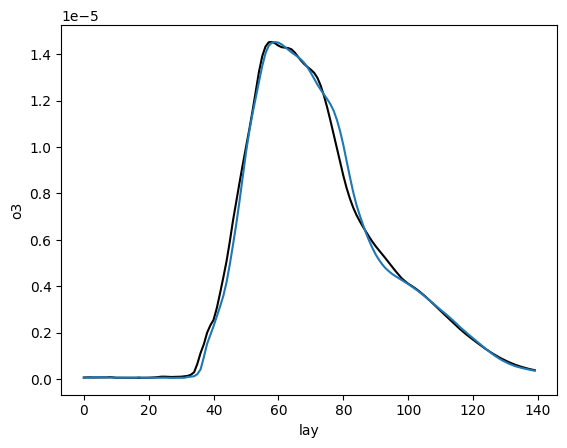

In [10]:
import matplotlib.pyplot as pl
import xarray as xr

pl.figure()
xr.open_dataset('/fs/ess/PFS0220/eurec4a/case_feb2nd_512_200m_jan30_tdtrans/eurec4a_input.nc',group='radiation',decode_times=True)['o3'].plot.line('k-')
xr.open_dataset('/fs/ess/PFS0220/eurec4a/case_feb2nd_512_200m_jan30_test/eurec4a_input.nc',group='radiation',decode_times=True)['o3'].plot()

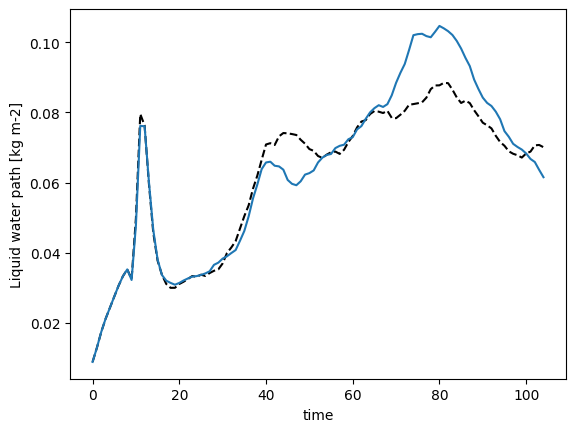

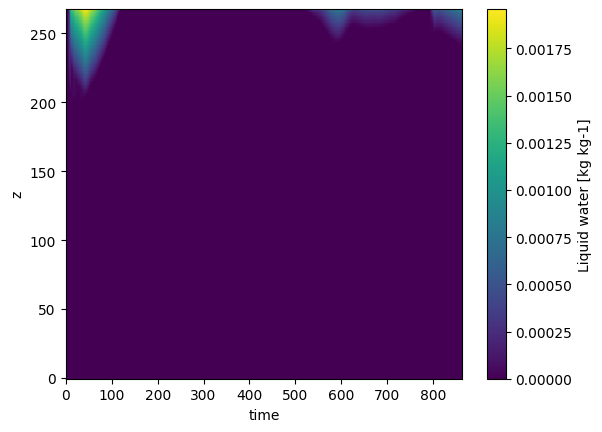

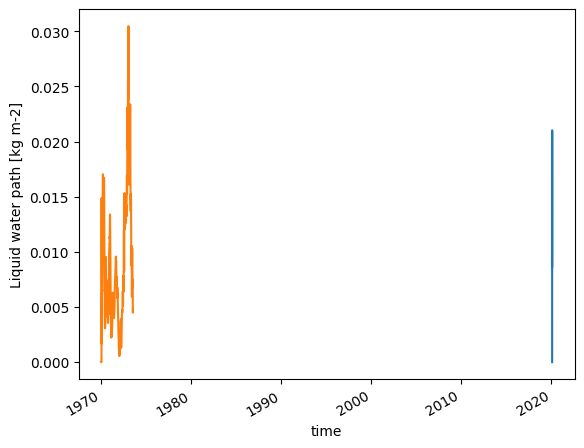

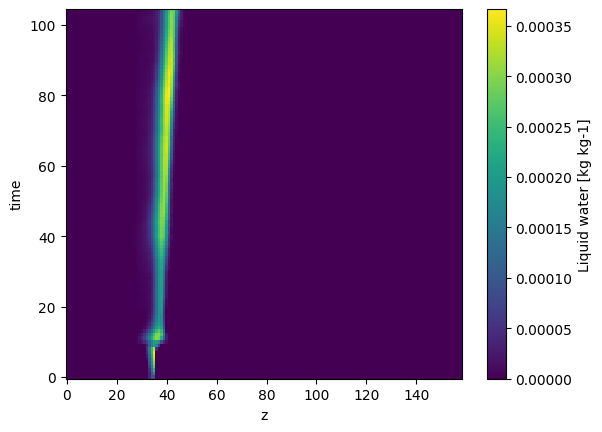

In [5]:
import matplotlib.pyplot as pl
import xarray as xr
import numpy as np

pl.figure()
xr.open_dataset('/fs/ess/PFS0220/eurec4a/case_feb9th_144_100m_2/eurec4a.default.0000000.nc',group='thermo',decode_times=True)['ql_path'].plot.line('k--')
xr.open_dataset('/fs/ess/PFS0220/eurec4a/case_feb9th_144_100m_1/eurec4a.default.0000000.nc',group='thermo',decode_times=True)['ql_path'].plot()

pl.figure()
(xr.open_dataset('/fs/ess/PFS0220/LSM/SGP_tessa/test_72h/SGP.default.0000000.nc',group='thermo',decode_times=True)['ql']).transpose().plot()

pl.figure()
xr.open_dataset('/fs/ess/PFS0220/eurec4a/SAM_results/EUREC4A_2Feb_512sqx160_100m_SAM_kc.nc',decode_times=True)['lwp'].plot()
xr.open_dataset('/fs/ess/PFS0220/eurec4a/case_feb2nd_testsp/eurec4a.default.0000000.nc',group='thermo',decode_times=True)['ql_path'].plot()

pl.figure()
xr.open_dataset('/fs/ess/PFS0220/eurec4a/case_feb9th_144_100m_2/eurec4a.default.0000000.nc',group='thermo',decode_times=True)['ql'].plot()